In [36]:
import requests
import xarray as xr
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

#useful package for creating masks and sections
import xesmf

In [21]:
sss_l3s = xr.open_dataset("cmems_geos_vel.nc").sel(time = slice(None, "2017"))

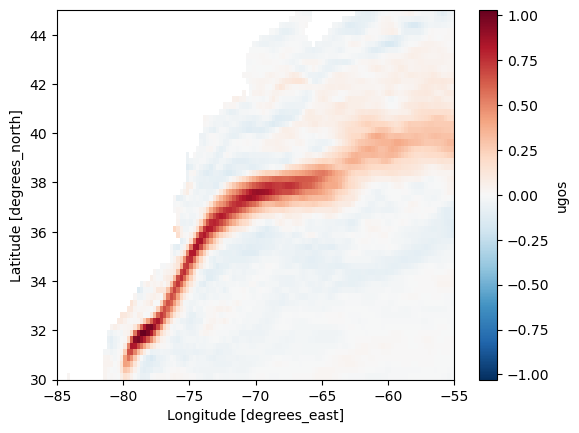

In [22]:
sss_l3s.mean("time").ugos.plot()

Text(0, 0.5, 'Joules')

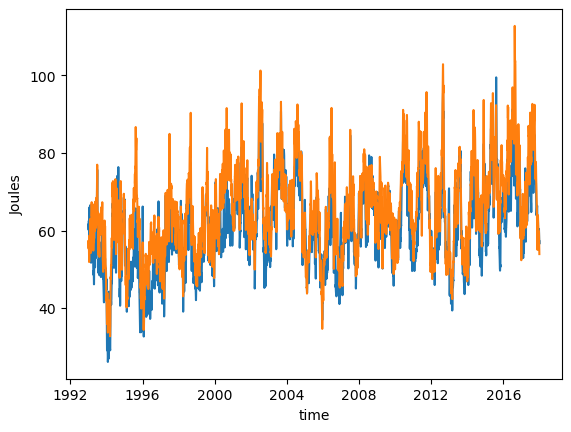

In [39]:
#remove every year
ga = sss_l3s.groupby("time.year") - sss_l3s.groupby("time.year").mean("time")

#compute EKE
EKE = ((ga.ugos**2) + (ga.vgos**2)).mean(["latitude", "longitude"])
EKE = 1000 * EKE / 2 

#plot EKE
EKE.plot(); plt.ylabel("Joules")


#remove annual climatology
ga = sss_l3s.groupby("time.month") - sss_l3s.groupby("time.month").mean("time")

#compute EKE
EKE = ((ga.ugos**2) + (ga.vgos**2)).mean(["latitude", "longitude"])
EKE = 1000 * EKE / 2 

#plot EKE
EKE.plot(); plt.ylabel("Joules")

Text(0, 0.5, 'Joules')

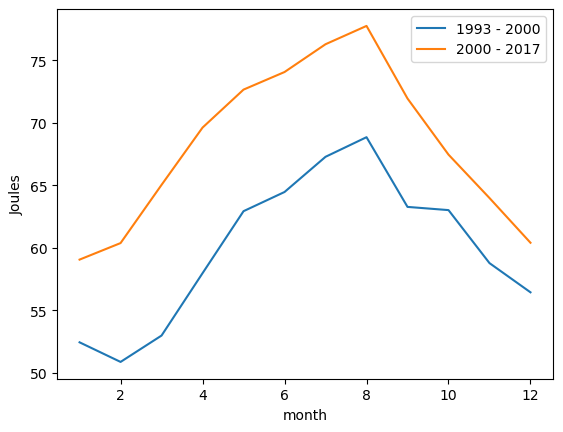

In [35]:
EKE_seasonal = EKE.sel(time = slice(None, "2000")).groupby("time.month").mean("time")
EKE_seasonal.plot(label = "1993 - 2000")


EKE_seasonal = EKE.sel(time = slice("2000", None)).groupby("time.month").mean("time")
EKE_seasonal.plot(label = "2000 - 2017")

plt.legend()
plt.ylabel("Joules")